# K-means com a base iris

Disciplina: Inteligência Artificial <br/>
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
Desenvolvido por: Nayara Thaiza P. Soares <br/>

**Objetivo: Realizar regressão com o algoritmo k-means na base iris** <br/>

In [1]:
#importações
import numpy as np  
import pandas as pd  
import random
import math
import operator
from numpy import genfromtxt
from random import randrange
#dados
from sklearn import datasets
#plot
import matplotlib.pyplot as plt


#carrega base de dados
iris = datasets.load_iris()

dataset = pd.DataFrame(iris.data) 
dataset = dataset.astype('float64') # converte para float
dataset.columns = iris.feature_names
dataset['tipo'] = iris.target 


# divide as características em listas
id = [] #indices
for i in range(len(dataset)):
    id.append(i)
f1 = dataset['sepal length (cm)'].values
f2 = dataset['sepal width (cm)'].values
f3 = dataset['petal length (cm)'].values
f4 = dataset['petal width (cm)'].values
species = dataset['tipo'].values

dados_originais = np.array(list(zip(id, species, f1, f2, f3, f4)))

#caracteristicas que irei usar no kmeans
dados = np.array(list(zip(f1, f2, f3, f4)))

In [2]:
#quantitativo de dados
observ = len(iris.data)
carac = len(dataset.columns)
print("Numero de observações (linhas): " + str(observ))
print("Numero de caracteristicas: " + str(carac))
dataset.head(10)



Numero de observações (linhas): 150
Numero de caracteristicas: 5


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Text(0, 0.5, 'Sepal Width')

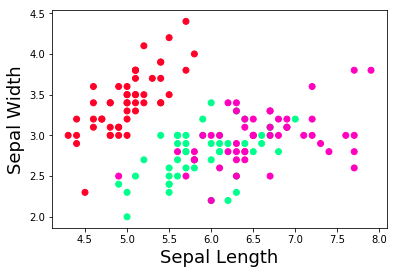

In [3]:
#sepal width e sepal length dos tres tipos de flores
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

**Função: euc_dist (distância euclidiana) e calc_dist (reorganiza os clusters de acordo com as novas distancias)** <br/>
**euc_dist:** Dados dois vetores como parametros é calculado a distância euclidiana entre eles <br/>
**calc_dist:** Em posse dos dados, e dos centros, calcula a distância euclidiana entre eles para posteriormente reorganizar os dados de acordo com seu novo centro.

In [4]:
#distancia euclidiana
def euc_dist(a, b):
    sum = 0
    for i, j in zip(a, b):
        a = (i - j) * (i - j)
        sum = sum + a
    return math.sqrt(sum)

#calcula distancia entre dados e o centro
def calc_dist(centros, dados):
    c_dist = []
    for i in centros:
        temp = []
        for j in dados:
            temp.append(euc_dist(i, j))
        c_dist.append(temp)
    return c_dist


**Função: centros_iniciais (define os centros iniciais dos clusters) e atualiza_centros (define os novos centros baseados nos vetores de clusters)** <br/>
**centros_iniciais**: Inicialmente os k centros são definidos randomicamente dentro do conjunto de dados e de acordo com a quantidade de caracteristicas selecionadas. <br/>
O parâmetro k é a quantidade de clusters, visto que cada cluster tem um centro.<br/>
**separa_clusters:** Em posse do numero de clusters (ou centros), e da tabela de distancia obtida na função calc_dist, reorgniza os clusters de acordo com as novas distâncias dos centros obtidas  <br/>
**atualiza_centros:** atualiza os centros, recalculando depois que os clusters foram re-organizados <br/>


In [5]:
#define os centros iniciais por meio de uma função randomica
def centros_iniciais(k, dados):
    c = []
    s = np.random.randint(low=1, high=len(dados), size=k)
    while (len(s) != len(set(s))):
        s = np.random.randint(low=1, high=len(dados), size=k)
    for i in s:
        c.append(dados[i])
    return c

#guarda a posicao de cada index do dataset separado por cluster
def separa_cluster(k, dist_table):
    clusters = []
    for i in range(k):
        clusters.append([])
    for i in range(len(dist_table[0])):
        d = []
        for j in range(len(dist_table)):
            d.append(dist_table[j][i])
        clusters[d.index(min(d))].append(i)
    return clusters

def atualiza_centros(centros, tab_cluster, dados):
    for i in range(len(centros)):
        if (len(tab_cluster[i]) > 0):
            temp = []
            for j in tab_cluster[i]:
                temp.append(list(dados[j]))
            sum = [0] * len(centros[i])
            for l in temp:
                sum = [(a + b) for a, b in zip(sum, l)] # compreensao de listas [expression for name in list]
            centros[i] = [p / len(temp) for p in sum]
    return centros



**Aplicando o kMeans (chamando as outras funções e expondo resultados)** <br/>
O iter é a quantidade de iterações, quanto mais iterações melhor, mas a partir de um certo número de iterações, os resultados não mudam. <br/>
Os membros dos clusters estão ordenado em: posição, tipo de flor, sepal length (cm), sepal width (cm), petal length (cm) e	petal width (cm).

In [6]:
#Chama função com num_clusters = 3 e num_iterações = 10
k = 3
iter = 50
  
dist_mem = []
cluster_mem = []
membros = []

#inicializa os centros
centros = centros_iniciais(k, dados)
#calcula a distancia entre centro e dataset
tabela_distancias = calc_dist(centros, dados)
tabela_clusters = separa_cluster(k, tabela_distancias)
novos_centros = atualiza_centros(centros, tabela_clusters, dados)

for i in range(iter):
    tabela_distancias = calc_dist(novos_centros, dados)
    tabela_clusters = separa_cluster(k, tabela_distancias)
    novos_centros = atualiza_centros(novos_centros, tabela_clusters, dados)


for i in range(len(novos_centros)):
    p1 = p2 = p3 = p4 = 0
    print("Centro #", i, ": ", novos_centros[i])
    print("Membros do cluster: ")
    for j in range(len(tabela_clusters[i])):
        print(dados_originais[tabela_clusters[i][j]])
        


        #verficando os extremamente proximos
        if(dados_originais[tabela_clusters[i][j]][2] == round(novos_centros[i][0], 1)):
            p1 = p1+1;
        if(dados_originais[tabela_clusters[i][j]][3] == round(novos_centros[i][1], 1)):
            p2 = p2+1;
        if(dados_originais[tabela_clusters[i][j]][4] == round(novos_centros[i][2], 1)):
            p3 = p3+1;
        if(dados_originais[tabela_clusters[i][j]][5] == round(novos_centros[i][3], 1)):
            p4 = p4+1;
    print(" ")
    print("Quantidade de valores da primeira caracteristica iguais ao centro ",i, ": ", p1)
    print("Quantidade de valores da segunda caracteristica iguais ao centro ",i, ": ", p2)
    print("Quantidade de valores da terceira caracteristica iguais ao centro ",i, ": ", p3)
    print("Quantidade de valores da quarta caracteristica iguais ao centro",i, ": ", p4)
    print(" ")
plt.show()

Centro # 0 :  [6.314583333333331, 2.8958333333333335, 4.973958333333335, 1.7031250000000007]
Membros do cluster: 
[50.   1.   7.   3.2  4.7  1.4]
[51.   1.   6.4  3.2  4.5  1.5]
[52.   1.   6.9  3.1  4.9  1.5]
[53.   1.   5.5  2.3  4.   1.3]
[54.   1.   6.5  2.8  4.6  1.5]
[55.   1.   5.7  2.8  4.5  1.3]
[56.   1.   6.3  3.3  4.7  1.6]
[58.   1.   6.6  2.9  4.6  1.3]
[59.   1.   5.2  2.7  3.9  1.4]
[61.   1.   5.9  3.   4.2  1.5]
[62.   1.   6.   2.2  4.   1. ]
[63.   1.   6.1  2.9  4.7  1.4]
[64.   1.   5.6  2.9  3.6  1.3]
[65.   1.   6.7  3.1  4.4  1.4]
[66.   1.   5.6  3.   4.5  1.5]
[67.   1.   5.8  2.7  4.1  1. ]
[68.   1.   6.2  2.2  4.5  1.5]
[69.   1.   5.6  2.5  3.9  1.1]
[70.   1.   5.9  3.2  4.8  1.8]
[71.   1.   6.1  2.8  4.   1.3]
[72.   1.   6.3  2.5  4.9  1.5]
[73.   1.   6.1  2.8  4.7  1.2]
[74.   1.   6.4  2.9  4.3  1.3]
[75.   1.   6.6  3.   4.4  1.4]
[76.   1.   6.8  2.8  4.8  1.4]
[77.   1.   6.7  3.   5.   1.7]
[78.   1.   6.   2.9  4.5  1.5]
[79.   1.   5.7  2.6  

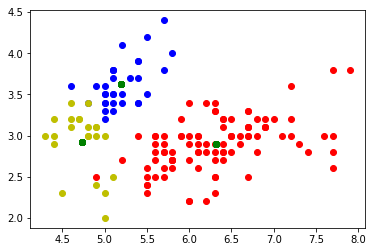

In [7]:
#gráfico dos clusters e seus respectivos centros (no exemplo estou supondo q existem 3 clusters)
#em verde temos os centros de cada cluster
for i in range(len(novos_centros)):
    for j in range(len(tabela_clusters[i])):
        if(i == 0):
            plt.plot(dados_originais[tabela_clusters[i][j]][2], dados_originais[tabela_clusters[i][j]][3], 'ro')
        elif(i == 1):
            plt.plot(dados_originais[tabela_clusters[i][j]][2], dados_originais[tabela_clusters[i][j]][3], 'bo')
        elif(i == 2):
            plt.plot(dados_originais[tabela_clusters[i][j]][2], dados_originais[tabela_clusters[i][j]][3], 'yo')

        plt.plot(novos_centros[i][0], novos_centros[i][1], 'go')

plt.show()



**Conclusão:** <br/>
Apesar de não ter uma métrica para avaliar se os resultados foram bons, a olho nú é possível perceber que, apesar dos pontos de alguns dos clusters estarem um pouco distantes do seu grupo, os pontos definidos como centros (em verde), está em uma região considerada central para o seu cluster.

**Referências:** <br/>
http://www.diegonogare.net/2015/08/entendendo-como-funciona-o-algoritmo-de-cluster-k-means/ <br/>
https://github.com/ExcViral/K-Means-Clustering/blob/master/k-means.py